In [ ]:
# Hello Folks Nirbhay Here a datascientist working for gurgaon based logistics(E-Commerce) org named NimbusPost, 
# Today i will be sharing very basic linear regression proj that will help you understand how we deal with real world regression problems using ML algorithms.

# So i am picking here a very basic Linear Regression Dataset where we will find that in respect to Year of exp of a person how salary changes in real world
# Remember that before picking any algorithm in data sceince project, we have to always figureout what type of problem statement we are going to deal with & which algorithm gonna suit it. 
# Linear Regression applies where we have to predict continuos value lets say stock price, house price, salary of person, age of a person


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Now let me quickly Load the basic dataset which has 2 attributes YearofExp & Salary in it


df = pd.read_csv("Salary_Data.csv")

In [ ]:
df.head(10)

In [10]:
# Now lets check the no of rows and no of columns our dataset contains
# Remember that left side it always shows rows count & and right side cols count

df.shape

(30, 2)

In [11]:
# Now will check the Dataset Information using

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [13]:
# We can clearly see now, that our dataset do not contains any null values/missing values in any columns as well as, Yearexp column has floatting decimal places values in it
# Whereas Salary column has interger values in it 

In [14]:
# Now i will be using describe function that will help me understand the statistical summary of my dataset

df.describe(include='all')

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [15]:
# As we can see from the summary its giving us very meaningful info like-:

# Our data contains 30 different observations/(Records)/(Rows Count)
# avg year of experience of our 30 observations(records)/Employee is 5, means most of employees are having around 5 yrs of exp 
# Avg salary of people having 5 yrs of exp is 76003 INR per month
# STDdev is telling us spread or despersion of yrs of exp & salary around the avg yrs of exp and avg salary 
# Or In other words STDdev values telling us that (around 68% of the salary of this dataset falls around 76003+-27414)/ incase of stddev of yrs of exp as well
# Next the summary telling us that minimum exp of a person in this 30 observations is 1.1 yrs and minimum salary of a person is 37731 INR / Month Salary
# Now 25% Is nothing but a measure of quartiles, its saying that 25% of people from the dataset are peoples who have 3.2 yrs or less of exp and 56720 INR or less / Monthly Income
# 50% of people in this dataset having less than or equal to 4.7 yrs of exp and less than or equal to 65237 INR / Monthly Income
# 75% Same as 25% & 50% Explanation
# Last but not least max telling us that maximum expience of our dataset is 10.5 you can say we have a candidate record who has 10.5 yrs of exp and is the highest over all and 
# he's salary is also the highest amongst all other candidtae /(records/observation) we have in our dataset

In [16]:
# Now we check if we have any missing values 

df.isnull().sum()

# so what we doing here is we simply saying first give us all values that is null in our dataset then sum it all to give us final count of null values

YearsExperience    0
Salary             0
dtype: int64

In [17]:
# No Null values found in our data that good

In [20]:
# Now the next very imp step in explarotory data analysis is finding if our data contains any outliers or not
# what is outliers suppose it as that is very disimmilar value in your dataset from majority of datapoints 
# If i take yrs of exp example then lets say if we find candidate with  50 yrs of exp that can be considered as outliers 

df.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [ ]:
# You folks must be thinking what this skew function does in finding outliers 
# Skew function measures the asymmetry of the distribution of values in a variable. 

# If the skewness is close to 0, it indicates that the distribution is approximately symmetric.
# If the skewness is positive, it indicates that the distribution is right-skewed (longer tail on the right side).
# If the skewness is negative, it indicates that the distribution is left-skewed (longer tail on the left side).

# Now lets plot the skewness of dataset to properly see and understand 

skewness = df.skew()

# Plot the skewness values
plt.figure(figsize=(10, 6))
skewness.plot(kind='bar', color='skyblue')
plt.title('Skewness of Numerical Variables')
plt.xlabel('Variables')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

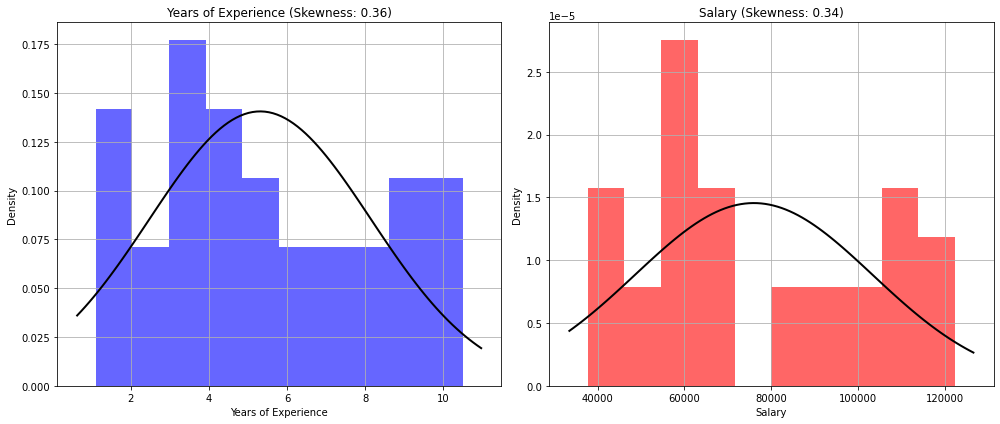

In [31]:
from scipy.stats import norm, skew

# Lets Calculate & Plot skewness of the 'YearsExperience' and 'Salary' columns which shows if our data is normally distributed or right skewed or left skewed

# Remember that if the dataset do not follow normal data distribution it will impact the model performance & accuracy

years_exp_skewness = skew(df['YearsExperience'])
salary_skewness = skew(df['Salary'])

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Ploting histogram for 'YearsExperience'
axs[0].hist(df['YearsExperience'], bins=10, density=True, alpha=0.6, color='b')
axs[0].set_title(f'Years of Experience (Skewness: {years_exp_skewness:.2f})')
axs[0].set_xlabel('Years of Experience')
axs[0].set_ylabel('Density')
axs[0].grid(True)

# Plot bell curve (normal distribution curve) for 'YearsExperience'
xmin, xmax = axs[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, df['YearsExperience'].mean(), df['YearsExperience'].std())
axs[0].plot(x, p, 'k', linewidth=2)

# Plot histogram for 'Salary'
axs[1].hist(df['Salary'], bins=10, density=True, alpha=0.6, color='r')
axs[1].set_title(f'Salary (Skewness: {salary_skewness:.2f})')
axs[1].set_xlabel('Salary')
axs[1].set_ylabel('Density')
axs[1].grid(True)

# Plot bell curve (normal distribution curve) for 'Salary'
xmin, xmax = axs[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, df['Salary'].mean(), df['Salary'].std())
axs[1].plot(x, p, 'k', linewidth=2)

plt.tight_layout()
plt.show()

In [32]:
# Now we will check the covariance in our dataset

# What is Covariance ?

# Covariance is a measure of the degree to which two variables change together. It indicates the direction of the linear relationship between two variables. Specifically:

# Positive covariance: Indicates that as one variable increases, the other variable also tends to increase. Similarly, as one variable decreases, the other variable tends to decrease. 
# This suggests a positive linear relationship between the variables.

# Negative covariance: Indicates that as one variable increases, the other variable tends to decrease, and vice versa. 
# This suggests a negative linear relationship between the variables.

df[['YearsExperience','Salary']].cov()

,YearsExperience,Salary
YearsExperience,8.053609,7.610630e+04
Salary,76106.303448,7.515510e+08


In [33]:
# Now we will check the correlation in our dataset

# what is correlation ?

# We find correlation to understand the strength and direction of the linear relationship between two variables. Correlation is a standardized measure that ranges from -1 to 1:

# A correlation of 1 indicates a perfect positive linear relationship: as one variable increases, the other variable also increases linearly.
# A correlation of -1 indicates a perfect negative linear relationship: as one variable increases, the other variable decreases linearly.
# A correlation of 0 indicates no linear relationship between the variables.


df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [34]:
# We can clearly see that our data has a positive relayionship between them which states that 
# if the year of exp increase the salary of a person also increase linearly 

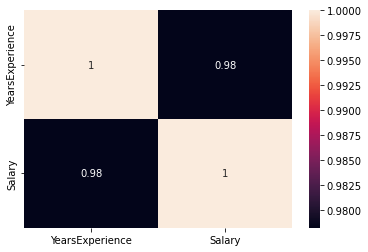

In [35]:
# Now lets plot a heatmap to visualize the relationship between input and output variable or independent or dependent variable or feature & target variable

sns.heatmap(df.corr(), annot=True)
plt.show()

# We use sns.heatmap(df.corr(), annot=True) along with plt.show() to create a heatmap visualization of the correlation matrix for the variables in the dataset df using the Seaborn library (sns). 
# This visualization technique is particularly useful for quickly identifying the strength and direction of the linear relationships between variables.

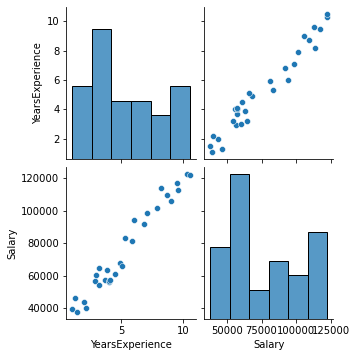

In [36]:
sns.pairplot(df)
plt.show()


# We use sns.pairplot(df) along with plt.show() to create a grid of scatterplots for pairwise relationships in the dataset df using the Seaborn library (sns).
# This visualization technique is particularly useful for exploring the relationships between multiple variables in the dataset.

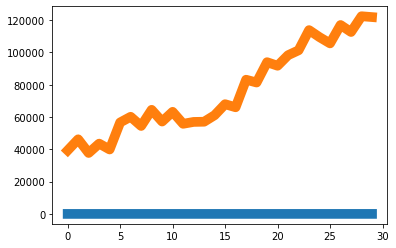

In [45]:
plt.plot(df, linestyle = '-', linewidth='9.7')

plt.show()

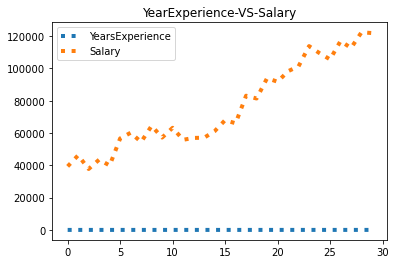

In [52]:
df.plot.line(linestyle = ':' , linewidth='4')

plt.title('YearExperience-VS-Salary')
plt.show()

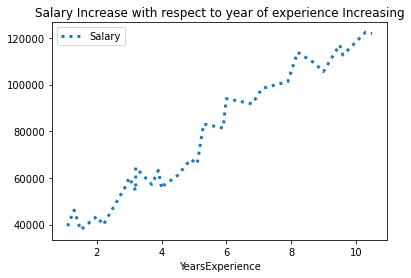

In [68]:
df = pd.DataFrame(data=df)

df.plot.line(x='YearsExperience',linestyle = ':', linewidth='3')

plt.title('Salary Increase with respect to year of experience Increasing')
plt.show()

In [69]:
# The Above Chart Cleaerly show thes the linear relationship between dependent and independent variable.

In [70]:
# Now lets select the features(dependent & independent variables) & start Building then Training our model to predict the salary when the yrs of exp given to model

X = df.drop('Salary', axis=1)

# X is always be your independent variable or input features for which you want to predict the target variable or values

In [72]:
y = df.Salary

# y gonna be always your Dependent/Target variable or output feature that you want to predict with respect to some value of X

In [81]:
X.head(), y.head().tolist()

(   YearsExperience
 0              1.1
 1              1.3
 2              1.5
 3              2.0
 4              2.2,
 [39343, 46205, 37731, 43525, 39891])

In [82]:
# Now in order to train our model first we need to teach the machine that based on past data, pattern, or relationship between Years of Experience & Salary
# We want to Predict future values

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

# Now you may be thinking what i just done let me explain in above code we are splitting the original dataset we have to train our model
# What we are doing here is we are saying we will keep the 30% of our original data to test the model accuracy later on and rest 70% data we use now onwards for training our model

In [89]:
print(X_train.shape), df['YearsExperience'].shape

# As you can see now i have printed both total records we had earlier in our YearExperience Column 
# which was 30 record along with training dataset was 70% so 70% of 30 records will be 21 records right means now we use 21 records to teach our machine the relationship & patterns

(21, 1)


(None, (30,))

In [90]:
print(y_train.shape), df['Salary'].shape


(21,)


(None, (30,))

In [91]:
# Same for Target Variable Original Record was 30, then we assigned 70% for training so y_train count is showing 21 records fair enough?

In [92]:
# Now we will import Linear Regression Algorithm using which we will train our model

from sklearn.linear_model import LinearRegression

In [93]:
LR = LinearRegression()

# LinearRegession() is nothing but a regressor which we will use to fit the training dataset then later predict the test dataset

In [94]:
LR.fit(X_train, y_train)

LinearRegression()

In [96]:
#Now we will find the Intercept # ALso Known as Beta 0

LR.intercept_

26777.39134119764

In [97]:
# Next we will find the SLope # Also known as Beta 1

LR.coef_

array([9360.26128619])

In [98]:
# Now as we trained our model its time for predicting the test dataset of 30% we kept during splitting the original dataset

y_pred = LR.predict(X_test)

In [101]:
y_pred.tolist()

[40817.783270488115,
 123188.08258899227,
 65154.46261459161,
 63282.410357352885,
 115699.87356003733,
 108211.66453108241,
 116635.8996886567,
 64218.43648597225,
 76386.776158024]

In [100]:
y_test # If we compare both of this values of y_predicted(model assumption), y_test(original) we can see that our model almost predicted nearby salaries

2      37731
28    122391
13     57081
10     63218
26    116969
24    109431
27    112635
11     55794
17     83088
Name: Salary, dtype: int64

In [103]:
# Now we will perform the different method of Evaluation on our Model
from sklearn import metrics

In [104]:
R2 = metrics.r2_score(y_test,y_pred)

In [106]:
R2

0.9740993407213511

In [107]:
# Our R-squared value is 0.97, it means that approximately 97% of the variability in the observed target values is explained by the regression model. 
# In other words: 97% of the variability in the dependent variable (target) can be predicted or explained by the independent variables (features) in the model.
# The model fits the observed data very well and provides a high degree of predictive power.
# A high R-squared value close to 1 indicates that the model is performing well in capturing the relationship between the features and the target variable. 
# However, it's essential to interpret the R-squared value in the context of the specific problem and domain, 
# as very high R-squared values may sometimes indicate overfitting or other issues with the model.

In [108]:
print(metrics.mean_absolute_error(y_test, y_pred))

3737.4178618788987


In [109]:
# Our result is 3737, which means that, on average, the absolute difference between the observed target values and the predicted target values is 3737 units 
# (or whatever unit the target variable is measured in).

# In other words: On average, the model's predictions are off by approximately 3737 units from the actual target values.
# Mean absolute error provides a straightforward measure of the model's accuracy, 
# as it represents the average magnitude of errors made by the model. Lower values of MAE indicate better performance, 
# as they suggest that the model's predictions are closer to the actual values.

In [110]:
print(metrics.mean_squared_error(y_test, y_pred))

23370078.800832972


In [111]:
# Our result is 23370078.800832972, it means that, on average, 
# the squared difference between the observed target values and the predicted target values is approximately 23370078.800832972 square units 
# (or whatever unit the target variable is measured in).

# In other words: The model's predictions are, on average, off by approximately 23370078.800832972 square units from the actual target values.
# Mean squared error measures the average squared difference between the predicted and actual values. 
# It penalizes larger errors more heavily than smaller errors because of the squaring operation. 
# Lower values of MSE indicate better performance, as they suggest that the model's predictions are closer to the actual values.

In [112]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

4834.260936361728


In [113]:
# Our result is 4834, it means that, on average, the squared difference between the observed target values and the predicted target values is approximately 4834 square units 
# (or whatever unit the target variable is measured in), 
# when taking the square root to revert back to the original scale of the target variable.

# In other words:The model's predictions are, on average, off by approximately 4834 units from the actual target values.

In [121]:
# Now lets Predict a Salary for somone who is having 5 yrs of exp lets see what result we get

print(LR.predict([[5.1]]))

[74514.72390079]


In [120]:
# our model predicted that with 5.1 yrs of work exp a candidate will get 74514 INR / Monthly Income
# Now lets see that what our Original dataset record says

df5yrs = df[df["YearsExperience"] == 5.1]
df5yrs

,YearsExperience,Salary
16,5.1,66029


In [ ]:
# As we can see our model predicted almost 8000 INR more salary for person having 5.1 yrs of exp

In [122]:
# Assumptions

error = y_test-y_pred
error

2    -3086.783270
28    -797.082589
13   -8073.462615
10     -64.410357
26    1269.126440
24    1219.335469
27   -4000.899689
11   -8424.436486
17    6701.223842
Name: Salary, dtype: float64

In [123]:
# No Autocorrelation

import statsmodels.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

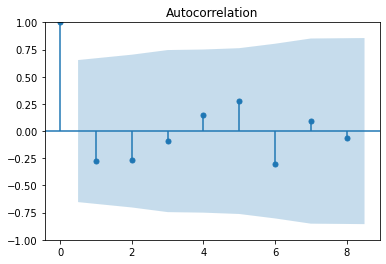

In [124]:
acf = plot_acf(error)
plt.show()

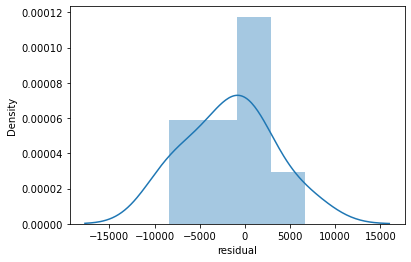

In [125]:
# Normality

sns.distplot(error)
plt.xlabel('residual')
plt.show()



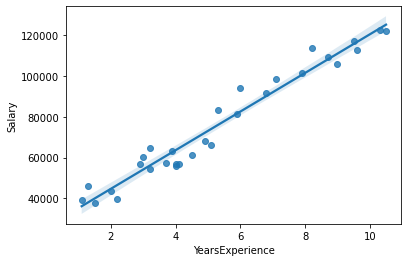

In [126]:
# Linearity

sns.regplot(X,y)
plt.show()

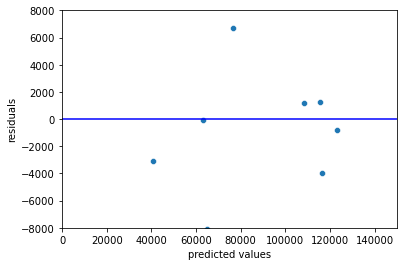

In [128]:
# Homoscedasticity

sns.scatterplot(x=y_pred,y=error)
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.xlim([0,150000])
plt.ylim([-8000,8000])
sns.lineplot([0,150000],[0,0],color='blue')
plt.show()

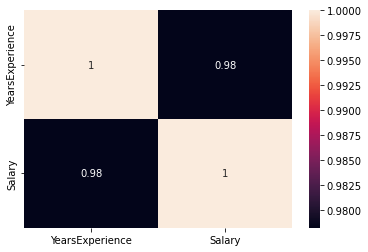

In [130]:
# Multicollinearity

sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
# Thanks for staying with me during this whole project and giving your time 
# Regards
# Nirbhay Tiwari